<a href="https://colab.research.google.com/github/shaina-12/Artificial-Intelligence/blob/main/Machine%20Learning/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
from google.colab import drive
drive.mount('/content/drive/')
col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house = pd.read_csv('/content/drive/My Drive/Colab Notebooks/housing.csv',names=col,delim_whitespace=True)
house.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [23]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [24]:
house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [25]:
house.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [26]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


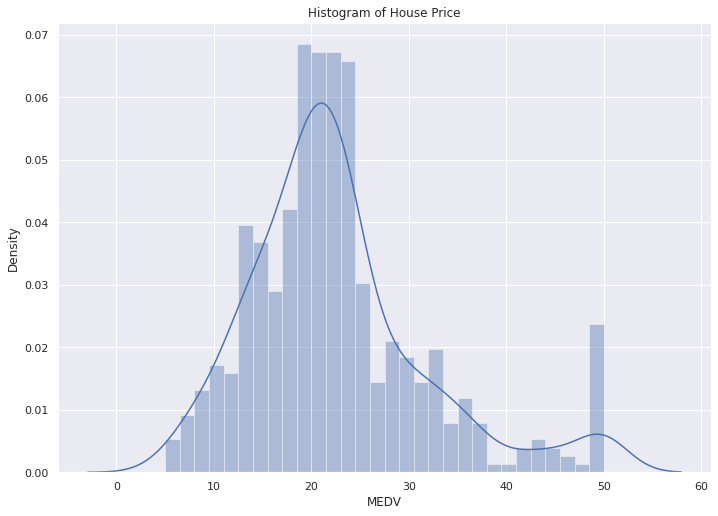

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(house['MEDV'],bins=30)
plt.title('Histogram of House Price')
plt.show()

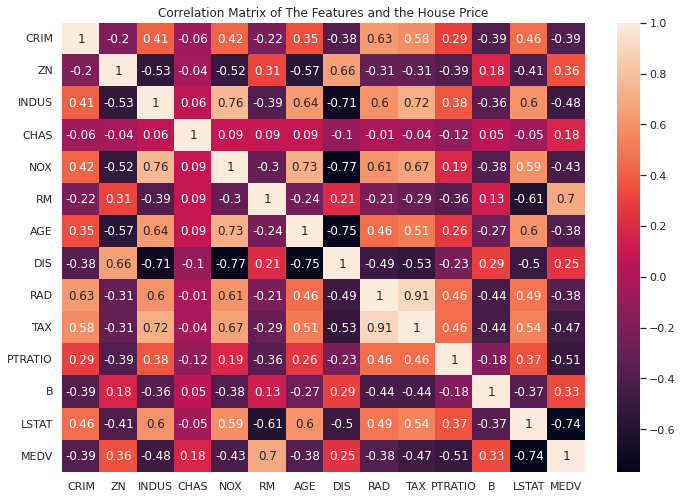

In [28]:
correlation_matrix = house.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True) #cmap='Blues_r'
plt.title('Correlation Matrix of The Features and the House Price')
plt.show()

In [29]:
features = house.drop('MEDV', axis=1)
target = house['MEDV']

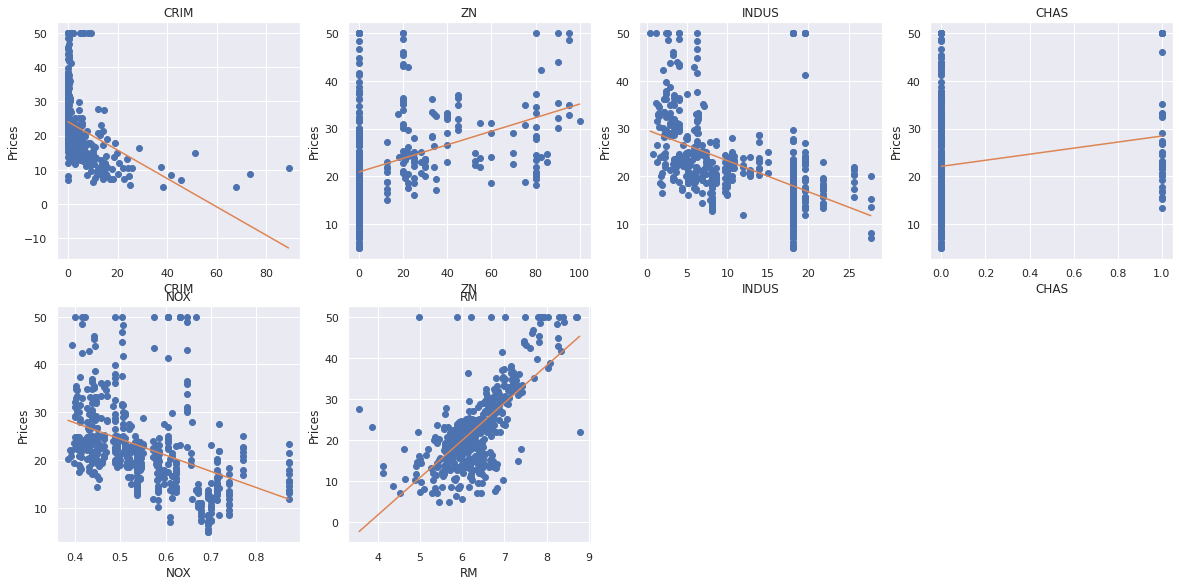

In [30]:
plt.figure(figsize=(20,20))
for i, col in enumerate(house.columns[0:6]):
  plt.subplot(4,4,i+1)
  x = house[col]
  y = house['MEDV']
  plt.plot(x,y,'o')
  plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('Prices')
plt.show()

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.30,random_state=42)

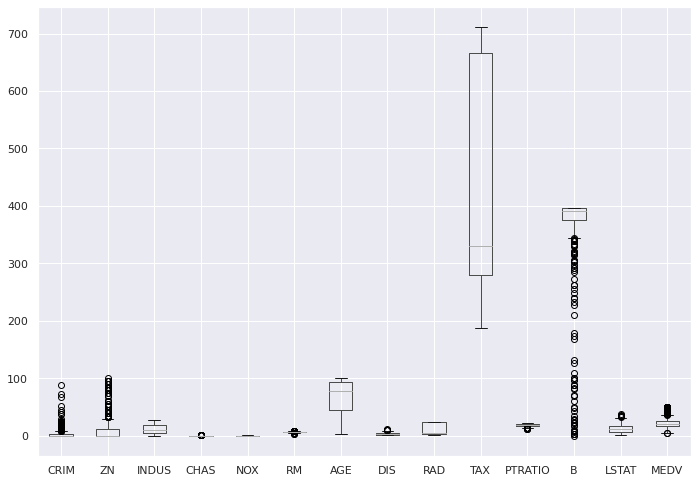

In [101]:
house.boxplot()

Linear Regression

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]
lin_model = Pipeline(steps)
lin_model.fit(x_train,y_train)
train_acc = lin_model.score(x_train,y_train)
test_acc = lin_model.score(x_test,y_test)
print('Train Accuracy:',train_acc)
print('Test Accuracy',test_acc)

Train Accuracy: 0.9442589216014636
Test Accuracy 0.6267309787614108


Lasso Regularisation

In [153]:
from sklearn.linear_model import Lasso
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.7, fit_intercept=True))
]
lin_model = Pipeline(steps)
lin_model.fit(x_train,y_train)
train_acc = lin_model.score(x_train,y_train)
test_acc = lin_model.score(x_test,y_test)
print('Train Accuracy:',train_acc)
print('Test Accuracy',test_acc)

Train Accuracy: 0.8099865806242007
Test Accuracy 0.7604286546841943


Ridge Regularisation

In [165]:
from sklearn.linear_model import Ridge
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=150, fit_intercept=True))
]
lin_model = Pipeline(steps)
lin_model.fit(x_train,y_train)
train_acc = lin_model.score(x_train,y_train)
test_acc = lin_model.score(x_test,y_test)
print('Train Accuracy:',train_acc)
print('Test Accuracy',test_acc)

Train Accuracy: 0.8681196554336744
Test Accuracy 0.8036496418237208
